In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('top_200_weekly.csv',parse_dates=['Week End'])
df_1 = pd.read_csv('top_200_weekly.csv')
print(df_1.shape)
df_1.head()

(52200, 9)


,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-30,2017-01-06,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-30,2017-01-06,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2016-12-30,2017-01-06,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2016-12-30,2017-01-06,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2016-12-30,2017-01-06,3NdDpSvN911VPGivFlV5d0,spotify:track:3NdDpSvN911VPGivFlV5d0


### Q7. What is the temporal changes in streaming, can we capture the observed stream patterns?


In [3]:
df_1['Year'] = pd.Series(map(lambda x:int(x[:4]) ,df_1['Week End']))
df_1['Month'] = pd.Series(map(lambda x:int(x[5:7]) ,df_1['Week End']))

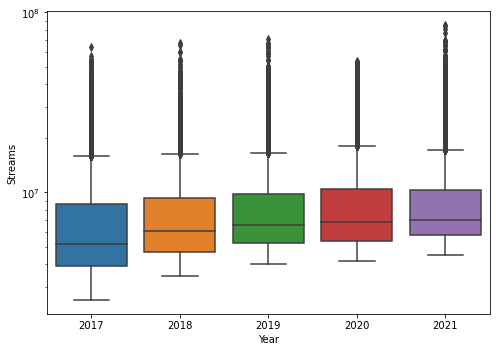

In [4]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x="Year", y="Streams",data=df_1)
# plt.xscale('log')
plt.yscale('log')
# plt.title('Best rank vs Number of weeks stayes')
# plt.xlabel('Number of weeks stayes')
# plt.ylabel('Streams')
plt.tight_layout()

plt.savefig('figures/figure6.png',dpi=300)
plt.show()

In [5]:
df_y_m = df_1.groupby(by=['Year','Month']).median().reset_index()

In [6]:
type(df_y_m)

pandas.core.frame.DataFrame

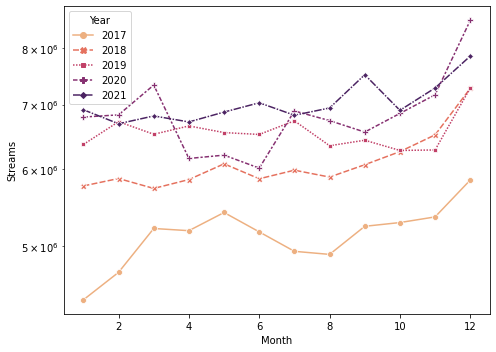

In [7]:
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=df_y_m, x="Month", y="Streams", hue="Year",style="Year",markers=True, palette="flare")
# plt.xscale('log')
plt.yscale('log')
# plt.title('Best rank vs Number of weeks stayes')
# plt.xlabel('Number of weeks stayes')
# plt.ylabel('Streams')
plt.tight_layout()

plt.savefig('figures/figure7.png',dpi=300)
plt.show()

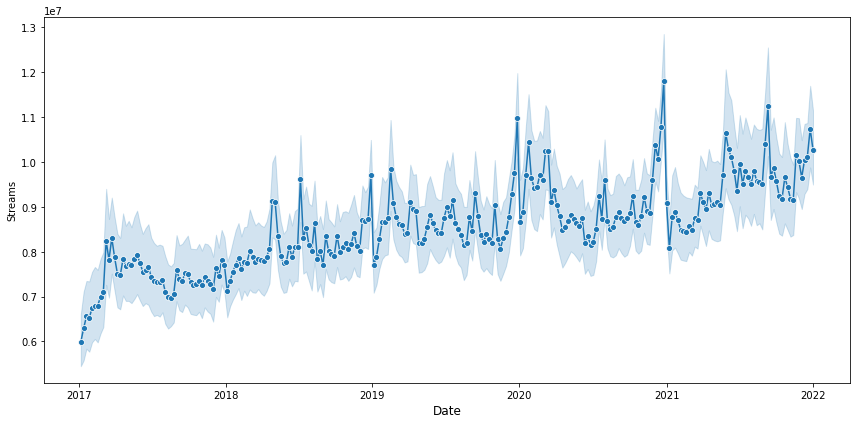

In [8]:
# sns.set_style("white")
plt.figure(figsize=(12,6))
# plt.ylim((201, 0))
# palette = ["green","orange","red","blue","purple"]
sns.lineplot(x='Week End',y='Streams',data=df,marker='o')#,hue='Track Name',palette=palette,marker='o')
plt.xlabel('Date',size=12)
# plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("figures/stream.png",dpi=300)
plt.show()